# Malalasekra 7.2


142
0.0
[[260.03668  227.7988   212.16434 ]
 [242.27457  211.19539  196.52988 ]
 [205.59163  178.17833  166.22992 ]
 [146.322    129.69638  123.981575]]


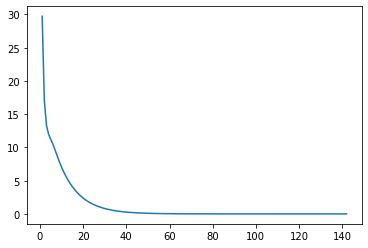

In [41]:
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
from scipy.linalg import norm
Nx=3
Ny=4
L=0.3
H=0.4
t=0.01
# ..............................cx is storing face value cx[i] and node_x is giving cell center value ......

dx_1=L/Nx #### to avoid initial confusion we ignore streatching case ############ 
dy_1=H/Ny #### to avoid initial confusion we ignore streatching case ############
#..............................................
k= 1000
q=0
qw=500000
T3=100

N=Nx*Ny
key=0
epc=10**(-6)
T_0=np.zeros((Ny,Nx),dtype=np.float32)
T=np.zeros((Ny,Nx),dtype=np.float32)
residu=[]
itaration=[]
count=0
j=0
while(key==0):
    for i in range(0,Ny):
        for j in range(0,Nx):
            if(i==0 and j==0): #1
                Aw=0
                Ae=k*dy_1/dx_1*0.01
                An=k*dx_1/dy_1*0.01
                As=0
                Sp=0                            #-(2*k*dy_1)/dx_1 -(2*k*dx_1)/dy_1
                Su=qw*dy_1*0.01                 #(q*dy_1*dx_1)+((2*k*dy_1)/dx_1)*T4+((2*k*dx_1)/dy_1)*T1
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+An*T[i+1][j]+Su)/Ap
            elif(i==0 and j==Nx-1):#3
                Aw=(k*dy_1)/dx_1*0.01
                Ae=0
                An=(k*dx_1)/dy_1*0.01
                As=0
                Sp=0                          #-(2*k*dy_1)/dx_1-(2*k*dx_1)/dy_1
                Su=0                          #(q*dy_1*dx_1) + ((2*k*dy_1)/dx_1)*T2 +((2*k*dx_1)/dy_1)*T1
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Aw*T[i][j-1]+An*T[i+1][j]+Su)/Ap
            elif(i==Ny-1 and j==Nx-1):#9
                Aw=(k*dy_1)/dx_1*0.01
                Ae=0
                An=0
                As=(k*dx_1)/dy_1*0.01
                Sp-(2*k*dx_1)/dy_1*0.01
                Su=+((2*k*dx_1)/dy_1)*T3*0.01
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Aw*T[i][j-1]+As*T[i-1][j]+Su)/Ap
            elif(i==Ny-1 and j==0):#7done
                Aw=0
                Ae=(k*dy_1)/dx_1*0.01
                An=0
                As=(k*dx_1)/dy_1*0.01
                Sp= -(2*k*dx_1)/dy_1*0.01
                Su=qw*dy_1*0.01 +((2*k*dx_1)/dy_1)*T3*0.01
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+As*T[i-1][j]+Su)/Ap
            elif(0<j<(Nx-1) and i==0):   #2done
                Aw=(k*dy_1)/dx_1*0.01
                Ae=(k*dy_1)/dx_1*0.01
                An=(k*dx_1)/dy_1*0.01
                As=0
                Sp=0
                Su=0
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+Aw*T[i][j-1]+An*T[i+1][j]+Su)/Ap
            elif(j==Nx-1 and 0<i<(Ny-1)):#6done 
                Aw=(k*dy_1)/dx_1*0.01
                Ae=0
                An=(k*dx_1)/dy_1*0.01
                As=(k*dx_1)/dy_1*0.01
                Sp=0
                Su=0
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(An*T[i+1][j]+As*T[i-1][j]+Aw*T[i][j-1]+Su)/Ap
            elif(0<j<(Nx-1) and i==(Ny-1)):#8
                Aw=(k*dy_1)/dx_1*0.01
                Ae=(k*dy_1)/dx_1*0.01
                An=0
                As=(k*dx_1)/dy_1*0.01
                Sp=-(2*k*dx_1)/dy_1*0.01
                Su=((2*k*dx_1)/dy_1)*T3*0.01
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+Aw*T[i][j-1]+As*T[i-1][j]+Su)/Ap
            elif(0<i<(Ny-1) and j==0):#4
                Aw=0
                Ae=(k*dy_1)/dx_1*0.01
                An=(k*dx_1)/dy_1*0.01
                As=(k*dx_1)/dy_1*0.01
                Sp=0
                Su=qw*dy_1*0.01
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+As*T[i-1][j]+An*T[i+1][j]+Su)/Ap
            elif(i!=0 and i!=(Ny-1) and j!=0 and j!=(Nx-1) ):#5
                Aw=(k*dy_1)/dx_1*0.01
                Ae=(k*dy_1)/dx_1*0.01
                An=(k*dx_1)/dy_1*0.01
                As=(k*dx_1)/dy_1*0.01
                Sp=0
                Su=0
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+Aw*T[i][j-1]+An*T[i+1][j]+As*T[i-1][j]+Su)/Ap
    #Calculate Resu:
    count=count+1
    itaration.append(count)            #itaration[j]=count
    #R[j]=(norm(T-T_0))/len(T)
    R=(norm(T-T_0))/len(T)
    residu.append(R)
    if(R<epc):
        key=1
    T_0=copy.copy(T)
    
#print(residu)
#T_final=np.reshape(T, (Ny,Nx))
print(count)
print(R)
print(T)
plt.plot(itaration,residu)

# Modification according to assignment 

133
9.344062164018396e-06
[[260.03656 227.7987  212.16425]
 [242.27448 211.19531 196.52982]
 [205.59157 178.17828 166.22989]
 [146.32198 129.69637 123.98156]]


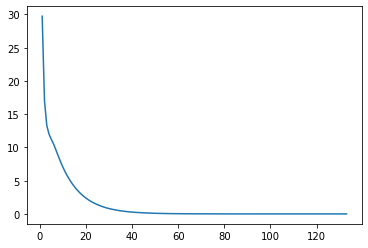

In [38]:
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
from scipy.linalg import norm
Nx=3
Ny=4
L=0.3
H=0.4
#.......................streatching mesh...................................
dx=np.zeros(Nx)
dy=np.zeros(Ny)
dx[0]=L/Nx
dy[0]=H/Ny
for i in range(1,Nx):
    dx[i]=dx[i-1]*1
for i in range(1,Ny):
    dy[i]=dy[i-1]*1

cx=np.zeros(Nx+1)
cy=np.zeros(Ny+1)
node_x=np.zeros(Nx)
node_y=np.zeros(Ny)
for i in range(1,Nx+1):
    cx[i]=cx[i-1]+dx[i-1]
for i in range(0,Nx):
    node_x[i]=(cx[i]+cx[i+1])/2
for i in range(1,Ny+1):
    cy[i]=cy[i-1]+dy[i-1]
for i in range(0,Ny):
    node_y[i]=(cy[i]+cy[i+1])/2 
# [X,Y] =np.meshgrid(x,y)
for i in range(0,Nx+1):
    cx[i]=(cx[i]/cx[-1])*L
for i in range(0,Ny+1):
    cy[i]=(cy[i]/cy[-1])*H

#[X,Y]=np.meshgrid(cx,cy)
# ..............................cx is storing face value cx[i] and node_x is giving cell center value ......

#dx_1=L/Nx #### to avoid initial confusion we ignore streatching case ############ 
#dy_1=H/Ny #### to avoid initial confusion we ignore streatching case ############
#..............................................
k= 1000
q=0
qw=500000
T3=100

N=Nx*Ny
key=0
epc=10**(-5)
T_0=np.zeros((Ny,Nx),dtype=np.float32)
T=np.zeros((Ny,Nx),dtype=np.float32)
residu=[]
itaration=[]
count=0
j=0
while(key==0):
    for i in range(0,Ny):
        for j in range(0,Nx):
            if(i==0 and j==0): #1
                Aw=0
                Ae=k*dy[i]/(node_x[j+1]-node_x[j])*0.01
                An=k*dx[j]/(node_y[i+1]-node_y[i])*0.01
                As=0
                Sp=0                            #-(2*k*dy_1)/dx_1 -(2*k*dx_1)/dy_1
                Su=qw*dy[i]*0.01                 #(q*dy_1*dx_1)+((2*k*dy_1)/dx_1)*T4+((2*k*dx_1)/dy_1)*T1
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+An*T[i+1][j]+Su)/Ap
            elif(i==0 and j==Nx-1):#3
                Aw=(k*dy[i])/(node_x[j]-node_x[j-1])*0.01
                Ae=0
                An=(k*dx[j])/(node_y[i+1]-node_y[i])*0.01
                As=0
                Sp=0                          #-(2*k*dy_1)/dx_1-(2*k*dx_1)/dy_1
                Su=0                          #(q*dy_1*dx_1) + ((2*k*dy_1)/dx_1)*T2 +((2*k*dx_1)/dy_1)*T1
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Aw*T[i][j-1]+An*T[i+1][j]+Su)/Ap
            elif(i==Ny-1 and j==Nx-1):#9
                Aw=(k*dy[i])/(node_x[j]-node_x[j-1])*0.01
                Ae=0
                An=0
                As=(k*dx[j])/(node_y[i]-node_y[i-1])*0.01
                Sp-(2*k*dx[j])/dy[i]*0.01                     #spc. case
                Su=+((2*k*dx[j])/dy[i])*T3*0.01               #spc. case
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Aw*T[i][j-1]+As*T[i-1][j]+Su)/Ap
            elif(i==Ny-1 and j==0):#7done
                Aw=0
                Ae=(k*dy[i])/(node_x[j+1]-node_x[j])*0.01
                An=0
                As=(k*dx[j])/(node_y[i]-node_y[i-1])*0.01
                Sp= -(2*k*dx[j])/dy[i]*0.01                    #spc. case
                Su=qw*dy[i]*0.01 +((2*k*dx[j])/dy[i])*T3*0.01  #spc. case
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+As*T[i-1][j]+Su)/Ap
            elif(0<j<(Nx-1) and i==0):   #2done
                Aw=(k*dy[i])/(node_x[j]-node_x[j-1])*0.01
                Ae=(k*dy[i])/(node_x[j+1]-node_x[j])*0.01
                An=(k*dx[j])/(node_y[i+1]-node_y[i])*0.01
                As=0
                Sp=0
                Su=0
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+Aw*T[i][j-1]+An*T[i+1][j]+Su)/Ap
            elif(j==Nx-1 and 0<i<(Ny-1)):#6done 
                Aw=(k*dy[i])/(node_x[j]-node_x[j-1])*0.01
                Ae=0
                An=(k*dx[j])/(node_y[i+1]-node_y[i])*0.01
                As=(k*dx[j])/(node_y[i]-node_y[i-1])*0.01
                Sp=0
                Su=0
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(An*T[i+1][j]+As*T[i-1][j]+Aw*T[i][j-1]+Su)/Ap
            elif(0<j<(Nx-1) and i==(Ny-1)):#8
                Aw=(k*dy[i])/(node_x[j]-node_x[j-1])*0.01
                Ae=(k*dy[i])/(node_x[j+1]-node_x[j])*0.01
                An=0
                As=(k*dx[j])/(node_y[i]-node_y[i-1])*0.01
                Sp=-(2*k*dx[j])/dy[i]*0.01                     #spc. case
                Su=((2*k*dx[j])/dy[i])*T3*0.01                 #spc. case
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+Aw*T[i][j-1]+As*T[i-1][j]+Su)/Ap
            elif(0<i<(Ny-1) and j==0):#4
                Aw=0
                Ae=(k*dy[i])/(node_x[j+1]-node_x[j])*0.01
                An=(k*dx[j])/(node_y[i+1]-node_y[i])*0.01
                As=(k*dx[j])/(node_y[i]-node_y[i-1])*0.01
                Sp=0
                Su=qw*dy[i]*0.01
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+As*T[i-1][j]+An*T[i+1][j]+Su)/Ap
            elif(i!=0 and i!=(Ny-1) and j!=0 and j!=(Nx-1) ):#5
                Aw=(k*dy[i])/(node_x[j]-node_x[j-1])*0.01
                Ae=(k*dy[i])/(node_x[j+1]-node_x[j])*0.01
                An=(k*dx[j])/(node_y[i+1]-node_y[i])*0.01
                As=(k*dx[j])/(node_y[i]-node_y[i-1])*0.01
                Sp=0
                Su=0
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+Aw*T[i][j-1]+An*T[i+1][j]+As*T[i-1][j]+Su)/Ap
    #Calculate Resu:
    count=count+1
    itaration.append(count)            #itaration[j]=count
    #R[j]=(norm(T-T_0))/len(T)
    R=(norm(T-T_0))/len(T)
    residu.append(R)
    if(R<epc):
        key=1
    T_0=copy.copy(T)
    
#print(residu)
#T_final=np.reshape(T, (Ny,Nx))
print(count)
print(R)
print(T)
plt.plot(itaration,residu)

[0.1    0.11   0.121  0.1331]


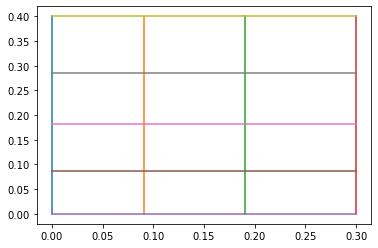

[0.         0.09063444 0.19033233 0.3       ] [0.         0.08618832 0.18099548 0.28528334 0.4       ]


In [37]:
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
from scipy.linalg import norm
Nx=3
Ny=4
L=0.3
H=0.4
#.......................streatching mesh...................................
dx=np.zeros(Nx)
dy=np.zeros(Ny)
dx[0]=L/Nx
dy[0]=H/Ny
for i in range(1,Nx):
    dx[i]=dx[i-1]*1.1
for i in range(1,Ny):
    dy[i]=dy[i-1]*1.1
print(dy)
cx=np.zeros(Nx+1)
cy=np.zeros(Ny+1)
node_x=np.zeros(Nx)
node_y=np.zeros(Ny)
for i in range(1,Nx+1):
    cx[i]=cx[i-1]+dx[i-1]
for i in range(0,Nx):
    node_x[i]=(cx[i]+cx[i+1])/2
for i in range(1,Ny+1):
    cy[i]=cy[i-1]+dy[i-1]
for i in range(0,Ny):
    node_y[i]=(cy[i]+cy[i+1])/2 
# [X,Y] =np.meshgrid(x,y)
for i in range(0,Nx+1):
    cx[i]=(cx[i]/cx[-1])*L
for i in range(0,Ny+1):
    cy[i]=(cy[i]/cy[-1])*H
[X,Y]=np.meshgrid(cx,cy)
plt.plot(X,cy)
plt.plot(cx,np.transpose(Y))
plt.show()
print(cx,cy)